In [1]:
import pandas as pd

# Load FAOSTAT dataset
faostat_file = 'FAOSTAT_data_en_11-24-2025.csv'
df_faostat = pd.read_csv(faostat_file)

# Load Crop Recommendation dataset
crop_rec_file = 'Crop_recommendation.csv'
df_crop_rec = pd.read_csv(crop_rec_file)

In [2]:
# Optional: display settings
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

In [3]:
# 1) Title and FAOSTAT preview (boxed)
from IPython.display import display  # Jupyter’s rich display [web:27][web:31]

print("FAOSTAT clean preview:\n")
display(df_faostat.head(10))   # boxed table

FAOSTAT clean preview:



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,"Anise, badian, c...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,01654,"Anise, badian, c...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livest...,356,India,5510,Production,01654,"Anise, badian, c...",2000,2000,t,166692.0,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,QCL,Crops and livest...,356,India,5412,Yield,01654,"Anise, badian, c...",2002,2002,kg/ha,296.8,A,Official figure,NaN
8,QCL,Crops and livest...,356,India,5510,Production,01654,"Anise, badian, c...",2002,2002,t,162362.0,A,Official figure,NaN
9,QCL,Crops and livest...,356,India,5312,Area harvested,01654,"Anise, badian, c...",2003,2003,ha,476618.0,A,Official figure,NaN


In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)   # show all rows, no "..."
# or set a large number, e.g.
# pd.set_option('display.max_rows', 1000)

Crop_Recommendation_clean_preview = df_crop_rec.head(10)  # if you made a subset
Crop_Recommendation_clean_preview


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
# Rename 'Item' column in FAOSTAT dataset to 'Crop'
df_faostat.rename(columns={'Item': 'Crop'}, inplace=True)

# Rename 'label' column in Crop Recommendation dataset to 'Crop'
df_crop_rec.rename(columns={'label': 'Crop'}, inplace=True)

# Check the renamed columns
print(df_faostat.columns)
print(df_crop_rec.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Crop', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')


In [6]:
# Split the 'Crop' column by commas into lists
df_faostat['Crop'] = df_faostat['Crop'].str.split(',')

# Explode the lists so each crop gets its own row
df_faostat = df_faostat.explode('Crop')

# Remove leading and trailing whitespace from each crop name
df_faostat['Crop'] = df_faostat['Crop'].str.strip()

# Check the result
print(df_faostat[['Crop']].head(10))

                  Crop
0                Anise
0               badian
0            coriander
0                cumin
0              caraway
0  fennel and junip...
0                  raw
1                Anise
1               badian
1            coriander


In [7]:
# After explode
df_exploded = df_faostat.explode('Crop')

# Display the first 10 rows
from IPython.display import display
display(df_exploded.head(10))

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,Anise,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,badian,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,coriander,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,cumin,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,caraway,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,fennel and junip...,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,01654,raw,2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,01654,Anise,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,01654,badian,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,01654,coriander,2000,2000,kg/ha,484.0,A,Official figure,NaN


In [8]:
# View the first 10 rows of the Crop column
print(df_faostat['Crop'].head(10))

# Check number of unique crops
print(f'Number of unique crops: {df_faostat["Crop"].nunique()}')

# Check if any rows still contain commas (should be zero)
print(f'Rows with commas: {(df_faostat["Crop"].str.contains(",")).sum()}')

0                  Anise
0                 badian
0              coriander
0                  cumin
0                caraway
0    fennel and junip...
0                    raw
1                  Anise
1                 badian
1              coriander
Name: Crop, dtype: object
Number of unique crops: 132
Rows with commas: 0


In [9]:
# Normalize crop names by converting to lowercase and stripping whitespace
df_faostat['Crop_norm'] = df_faostat['Crop'].str.lower().str.strip()
df_crop_rec['Crop_norm'] = df_crop_rec['Crop'].str.lower().str.strip()

# Merge datasets on the normalized crop names
df_merged = pd.merge(
    df_faostat,
    df_crop_rec,
    left_on='Crop_norm',
    right_on='Crop_norm',
    how='inner'
)

# Check merged dataset shape and preview
print(f'Merged dataset shape: {df_merged.shape}')
print(df_merged.head())

Merged dataset shape: (28800, 24)
  Domain Code               Domain  Area Code (M49)   Area  Element Code  \
0         QCL  Crops and livest...              356  India          5312   
1         QCL  Crops and livest...              356  India          5312   
2         QCL  Crops and livest...              356  India          5312   
3         QCL  Crops and livest...              356  India          5312   
4         QCL  Crops and livest...              356  India          5312   

          Element Item Code (CPC)  Crop_x  Year Code  Year Unit     Value  \
0  Area harvested           01610  Coffee       2000  2000   ha  308433.0   
1  Area harvested           01610  Coffee       2000  2000   ha  308433.0   
2  Area harvested           01610  Coffee       2000  2000   ha  308433.0   
3  Area harvested           01610  Coffee       2000  2000   ha  308433.0   
4  Area harvested           01610  Coffee       2000  2000   ha  308433.0   

  Flag Flag Description Note Crop_norm    N   

In [10]:
from IPython.display import display  # only once at top of notebook

# Show shape in text
print(f'Merged dataset shape: {df_merged.shape}')

# Show nice boxed table for the first rows
display(df_merged.head(10))   # no print(), this gives the HTML box


Merged dataset shape: (28800, 24)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
5,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,23,25,23.412371,52.269947,6.869720,139.367075,coffee
6,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee
7,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,89,25,34,23.078954,63.658615,7.184802,129.876544,coffee
8,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,118,18,32,27.649611,51.110440,6.351824,122.839282,coffee
9,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,111,32,34,25.467437,69.351612,6.392048,171.376446,coffee


In [11]:
#drop Note, drop nulls in essential columns
if 'Note' in df_merged.columns:
    df_merged = df_merged.drop(columns=['Note'])

essential_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_clean = df_merged.dropna(subset=essential_cols)
print(f"Shape after dropping nulls in essential columns: {df_clean.shape}")
df_clean[essential_cols].head()


Shape after dropping nulls in essential columns: (28800, 23)


,N,P,K,temperature,humidity,ph,rainfall
0,91,21,26,26.333780,57.364700,7.261314,191.654941
1,107,21,26,26.452885,55.322227,7.235070,144.686134
2,83,38,35,25.708227,52.886671,7.189156,136.732509
3,108,24,31,24.128325,56.181077,6.431900,147.275782
4,116,28,34,23.443723,60.395233,6.423211,122.210325


In [12]:
#drop duplicates
print(f"Number of duplicate rows before dropping: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Shape after dropping duplicates: {df_clean.shape}")
df_clean.head()


Number of duplicate rows before dropping: 0
Shape after dropping duplicates: (28800, 23)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,01610,Coffee,2000,2000,ha,308433.0,A,Official figure,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [13]:
#summary statistics
df_clean[essential_cols].describe()


,N,P,K,temperature,humidity,ph,rainfall
count,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
mean,70.667500,63.927500,77.477500,24.509440,75.664440,6.493623,159.663009
std,31.211949,41.006836,70.991792,5.098522,10.574336,0.593967,63.733378
min,0.000000,15.000000,25.000000,8.825675,50.045570,5.005307,65.010953
25%,55.000000,37.000000,35.000000,23.176366,70.648966,6.085485,105.096066
50%,79.000000,47.000000,40.000000,24.846438,80.719235,6.428868,168.977582
75%,92.000000,75.000000,82.500000,26.392599,82.739731,6.981234,194.931719
max,120.000000,145.000000,205.000000,41.948657,89.891065,7.868475,298.560117


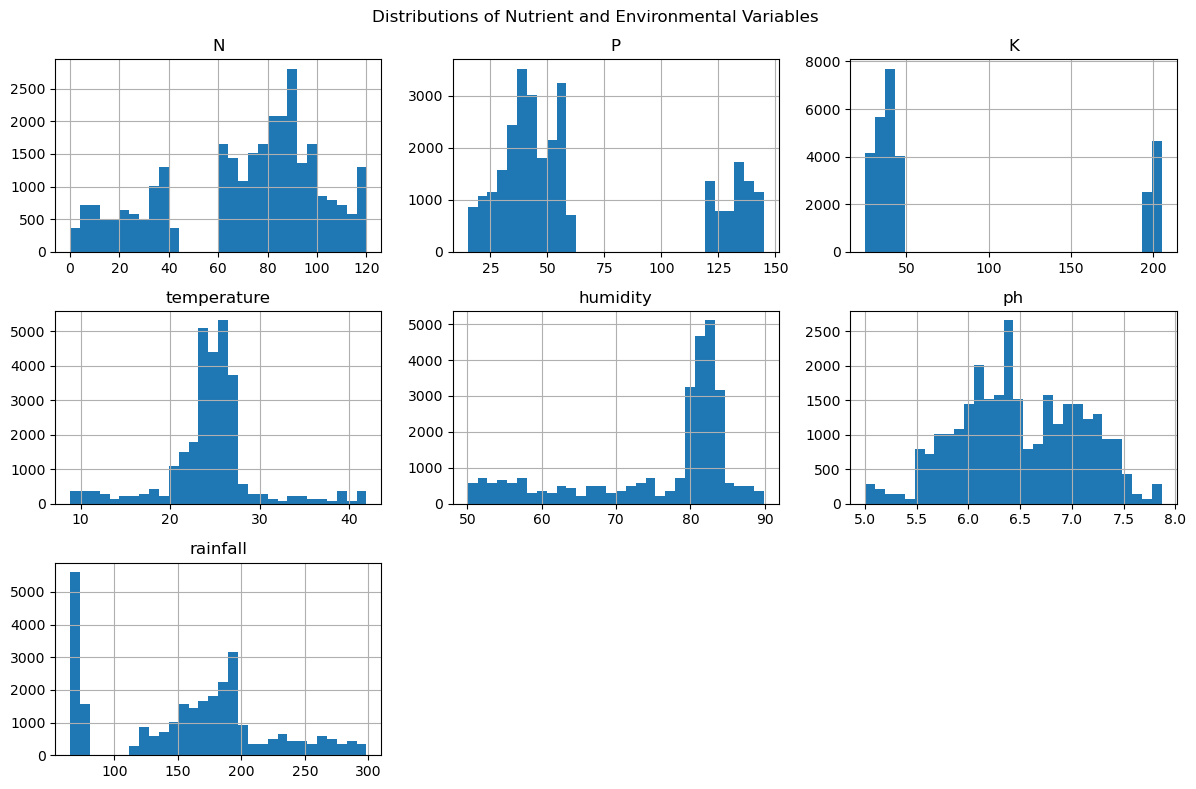

In [14]:
#histograms
import matplotlib.pyplot as plt
import seaborn as sns   
df_clean[essential_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distributions of Nutrient and Environmental Variables")
plt.tight_layout()
plt.show()


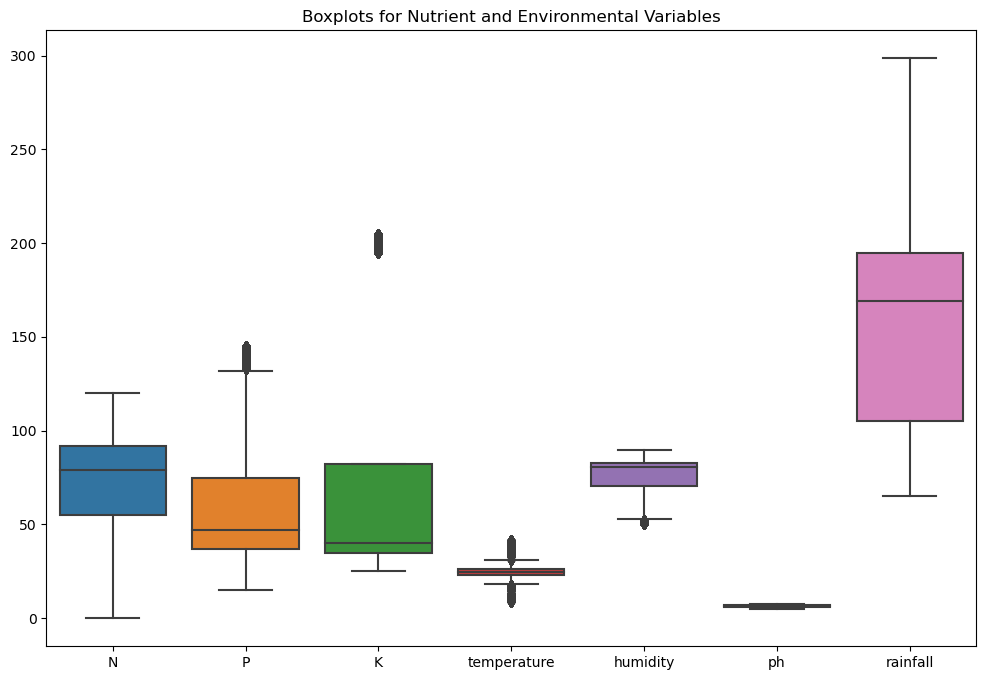

In [15]:
#boxplots
plt.figure(figsize=(12,8))
sns.boxplot(data=df_clean[essential_cols])
plt.title('Boxplots for Nutrient and Environmental Variables')
plt.show()


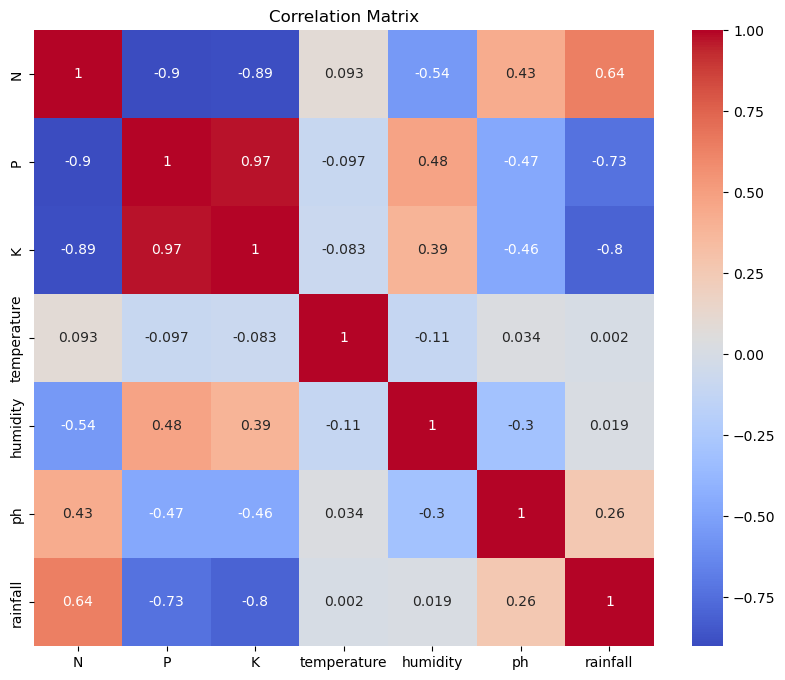

In [16]:
#corelation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[essential_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
#top 20 crops
print("\nTop 20 crops by frequency:")

if 'Crop_x' in df_clean.columns:
    display(df_clean['Crop_x'].value_counts().head(20))
else:
    display(df_clean['Crop'].value_counts().head(20))



Top 20 crops by frequency:


Crop_x
Coffee    7200
Grapes    7200
Jute      7200
Rice      7200
Name: count, dtype: int64

In [18]:
# ------------------------------
# STEP 1: PREPARE LABEL COLUMN
# ------------------------------

# For FAOSTAT (after explode)
df_exploded.rename(columns={'Crop': 'label'}, inplace=True)

# For Crop Recommendation dataset
df_crop_rec.rename(columns={'Crop': 'label'}, inplace=True)

# Convert to lowercase and strip spaces for perfect matching
df_exploded['label'] = df_exploded['label'].str.lower().str.strip()
df_crop_rec['label'] = df_crop_rec['label'].str.lower().str.strip()


In [19]:
print("Sample FAOSTAT labels:", df_exploded['label'].unique()[:40])
print("\nSample Crop Recommendation labels:", df_crop_rec['label'].unique()[:40])

common_labels = set(df_exploded['label']).intersection(df_crop_rec['label'])
print("\nCommon labels found:", common_labels)
print("Number of common labels:", len(common_labels))


Sample FAOSTAT labels: ['anise' 'badian' 'coriander' 'cumin' 'caraway'
 'fennel and juniper berries' 'raw' 'apples' 'apricots' 'areca nuts'
 'bananas' 'barley' 'beans' 'dry' 'beer of barley' 'malted' 'cabbages'
 'cantaloupes and other melons' 'carrots and turnips' 'cashew nuts'
 'in shell' 'cassava' 'fresh' 'castor oil seeds'
 'cauliflowers and broccoli' 'cherries' 'chick peas'
 'chillies and peppers' 'dry (capsicum spp.' 'pimenta spp.)'
 'green (capsicum spp. and pimenta spp.)' 'cocoa beans' 'coconut oil'
 'coconuts' 'coffee' 'green' 'coir' 'cotton lint' 'ginned' 'cotton seed']

Sample Crop Recommendation labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Common labels found: {'coffee', 'grapes', 'jute', 'rice'}
Number of common labels: 4


In [20]:
# Re-create the full label mapping dictionary
label_mapping = {
    'bananas': 'banana',
    'apples': 'apple',
    'coconuts': 'coconut',
    'coffee': 'coffee',
    'coffee, green': 'coffee',
    'grapes': 'grapes',
    'chick peas': 'chickpea',
}


In [21]:
label_mapping.update({
    'cotton lint': 'cotton',
    'cotton seed': 'cotton'
})


In [22]:
df_exploded['label'] = df_exploded['label'].replace(label_mapping)


In [23]:
df_merged = df_exploded.merge(df_crop_rec, on='label', how='inner')
display(df_merged.head(20))


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),label,Year Code,Year,Unit,Value,Flag,Flag Description,Note,N,P,K,temperature,humidity,ph,rainfall,Crop_norm
0,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
5,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,32,137,204,22.860066,93.128599,5.824152,117.729673,apple
6,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,27,139,205,22.484030,93.408192,5.772180,105.547363,apple
7,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,0,123,205,22.027754,92.961295,5.790993,121.134918,apple
8,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,22,144,196,21.911913,91.687481,6.499227,117.076128,apple
9,QCL,Crops and livest...,356,India,5312,Area harvested,01341,apple,2000,2000,ha,230000.0,A,Official figure,NaN,1,124,199,23.710591,93.273924,5.658474,112.667659,apple


In [24]:
cols_to_drop = [
    'Domain', 'Domain Code', 'Area Code', 'Area',
    'Element Code', 'Element', 'Item Code',
    'Item', 'Year Code', 'Year', 'Unit', 'Value',
    'Flag Description', 'Note',
    'Area Harvested', 'Yield', 'Production'
]


In [25]:
df_cleaned = df_merged.drop(columns=[c for c in cols_to_drop if c in df_merged.columns])


In [26]:
display(df_cleaned.head())
print("Final columns:", df_cleaned.columns)


,Area Code (M49),Item Code (CPC),label,Flag,N,P,K,temperature,humidity,ph,rainfall,Crop_norm
0,356,01341,apple,A,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,356,01341,apple,A,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,356,01341,apple,A,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,356,01341,apple,A,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,356,01341,apple,A,20,129,201,23.410447,91.699133,5.587906,116.077793,apple


Final columns: Index(['Area Code (M49)', 'Item Code (CPC)', 'label', 'Flag', 'N', 'P', 'K',
       'temperature', 'humidity', 'ph', 'rainfall', 'Crop_norm'],
      dtype='object')
